Objective - Is to predict the Delivery time using Sorting time

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data= pd.read_csv('C:/Users/user/Downloads/delivery_time.csv')
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [3]:
df=data.copy()
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


## Exploratory Data Analysis

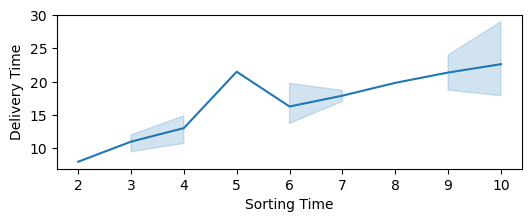

In [4]:
## Variation of Delivery time with the sorting time
plt.figure(figsize=(6,2))
sns.lineplot(x='Sorting Time',y='Delivery Time',data=df)
plt.savefig('Delivery time versus Soting time.jpg')

Increase in the sorting time causes an increase in the delivery time, both are directly proportional

The skewness is : 0.35
count    21.000000
mean     16.790952
std       5.074901
min       8.000000
25%      13.500000
50%      17.830000
75%      19.750000
max      29.000000
Name: Delivery Time, dtype: float64


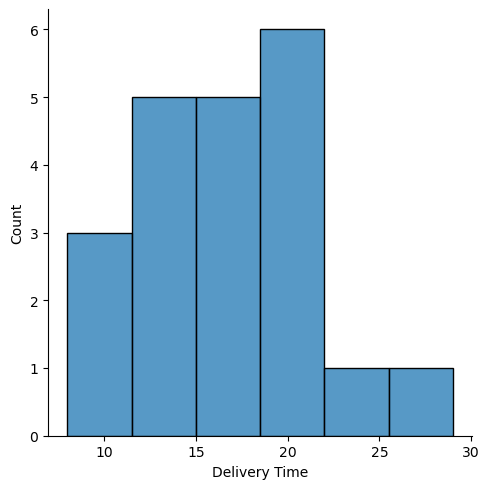

In [5]:
# Distribution of Delivery Time data
sns.displot(df['Delivery Time'])
print('The skewness is :', round(df['Delivery Time'].skew(),2))
print(df['Delivery Time'].describe())
plt.savefig('Distribution of Delivery time.jpg')

The distribution of Delievery time is normally distributed

The skewness is : 0.05
count    21.000000
mean      6.190476
std       2.542028
min       2.000000
25%       4.000000
50%       6.000000
75%       8.000000
max      10.000000
Name: Sorting Time, dtype: float64


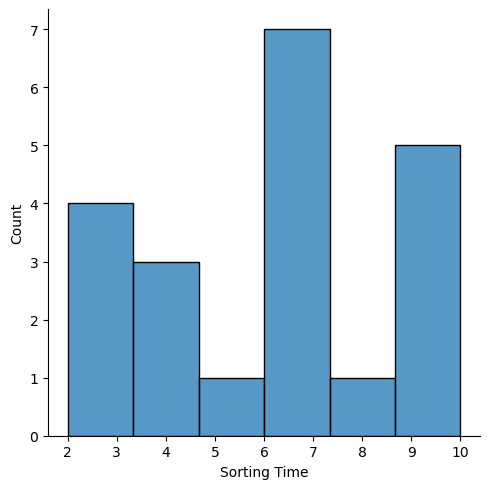

In [6]:
# Distribution of Sorting Time data
sns.displot(df['Sorting Time'])
print('The skewness is :', round(df['Sorting Time'].skew(),2))
print(df['Sorting Time'].describe())
plt.savefig('Distribution of Sorting time.jpg')

The distribution of Sorting time is normally distributed

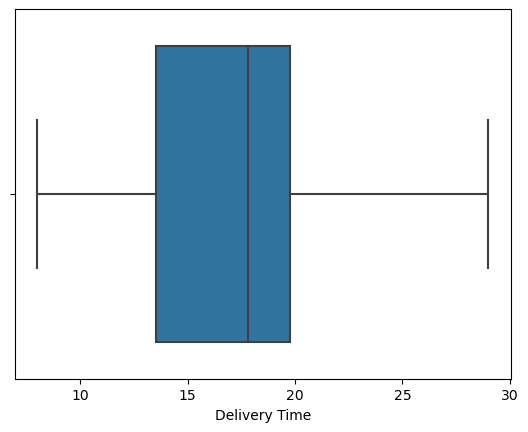

In [7]:
## Box plot of Delivery time data to check the presence of outliers
sns.boxplot(x=df['Delivery Time'])
plt.savefig('Box plot Delievery time.jpg')

This means, there are no outliers in the delivery time data

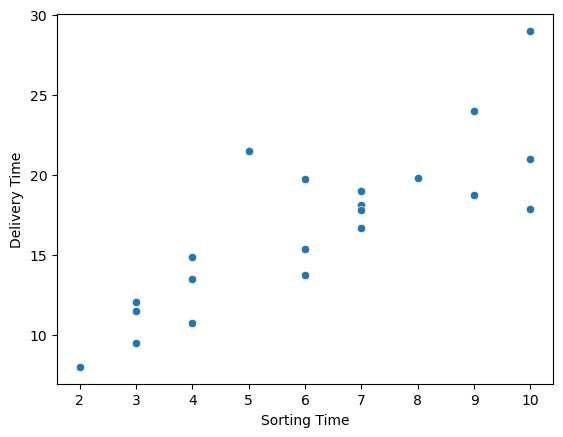

In [8]:
sns.scatterplot(x='Sorting Time',y='Delivery Time',data=df)
plt.savefig('Scattering plot of Sorting time.jpg')

1. From the scatter plot it can be concluded that Delivery time does depend on sorting time but only to certain extent.

2. For the same sorting time there are different delivery time that means it also depend on other parameters.

In [9]:
## the variance of data
v=df[['Sorting Time','Delivery Time']].var()
print('The variance in the Delievery time and Sorting time is:\n',round(v,2))

The variance in the Delievery time and Sorting time is:
 Sorting Time      6.46
Delivery Time    25.75
dtype: float64


data is slightly variated

In [10]:
model_data=df[['Sorting Time','Delivery Time']]
print('The model data is given as:\n', model_data)

The model data is given as:
     Sorting Time  Delivery Time
0             10          21.00
1              4          13.50
2              6          19.75
3              9          24.00
4             10          29.00
5              6          15.35
6              7          19.00
7              3           9.50
8             10          17.90
9              9          18.75
10             8          19.83
11             4          10.75
12             7          16.68
13             3          11.50
14             3          12.03
15             4          14.88
16             6          13.75
17             7          18.11
18             2           8.00
19             7          17.83
20             5          21.50


In [11]:
## Correlation between Delivery time and sorting time
c=round(model_data.corr(),2)
print('The correlation between Delivery time and sorting time is :\n',c)

The correlation between Delivery time and sorting time is :
                Sorting Time  Delivery Time
Sorting Time           1.00           0.83
Delivery Time          0.83           1.00


## Sampling the data

In [12]:
# the number of rows and columns in the given data
print('The number of rows and columns in the given data are:')
model_data.shape

The number of rows and columns in the given data are:


(21, 2)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x=model_data['Sorting Time']
y=model_data['Delivery Time']

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8)

In [16]:
## The shape of data after distributing it into train and test category
x_train.shape,y_train.shape

((16,), (16,))

In [17]:
x_test.shape,y_test.shape

((5,), (5,))

In [18]:
# Reshaping of the data as it is a simple Linear Regression
x_train=x_train.values.reshape(-1,1)
y_train=y_train.values.reshape(-1,1)

## Model building

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
model=LinearRegression()
print(model)

LinearRegression()


In [21]:
model_fit=model.fit(x_train,y_train)

In [22]:
# Coefficient 
print('The coefficient of the fitted data is: ', model_fit.coef_)

The coefficient of the fitted data is:  [[1.35407521]]


In [23]:
# Intercept of the fitting
print('The Intercept of the fitted data is: ',model_fit.intercept_)

The Intercept of the fitted data is:  [7.86119724]


## Model Prediction

In [24]:
x_test=x_test.values.reshape(-1,1)

In [25]:
pred=model_fit.predict(x_test)
pred

array([[20.04787414],
       [18.69379893],
       [11.92342287],
       [20.04787414],
       [21.40194935]])

In [26]:
df_pred=pd.DataFrame(pred,columns=['pred'])
df_pred

,pred
0,20.047874
1,18.693799
2,11.923423
3,20.047874
4,21.401949


In [27]:
df_pred['Actual']=y_test.values
df_pred

,pred,Actual
0,20.047874,18.75
1,18.693799,19.83
2,11.923423,12.03
3,20.047874,24.00
4,21.401949,29.00


## Error Calculation

In [28]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from math import sqrt

In [29]:
# R square value 
st=r2_score(df_pred['Actual'],df_pred['pred'])
print('The strength of the model is :',round(st,3))

The strength of the model is : 0.521


The strength of the model is strong since r square value lies between 0 and 1.

strongest when approaches 1 and weakest when approaches 0

So, the fitted model is fine.

In [30]:
# RMSE
RMSE= sqrt(mean_squared_error(df_pred['Actual'],df_pred['pred']))
print('The root mean square value of the model is :',round(RMSE,3))

The root mean square value of the model is : 3.907


## Saving the model

In [31]:
import joblib

In [32]:
file_name='Delivery_simpleregression_prj1.sav'

In [33]:
joblib.dump(model_fit,file_name)

['Delivery_simpleregression_prj1.sav']